In [1]:
'''JesseRuiz_Time_Series_Analysis_Project_Codeup_2019'''

'JesseRuiz_Time_Series_Analysis_Project_Codeup_2019'

In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series

from fbprophet import Prophet
from sklearn import metrics

import math

from fitbit import missing_values_col
from fitbit import convert_to_float
from fitbit import prepare_fitbit

import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [241]:
# ===========
# ENVIRONMENT
# ===========

import fitbit


# ===========
# ACQUISITION
# ===========

chunks = fitbit.get_fitbit(files=['2018-04-26_through_2018-05-26.csv',
                           '2018-05-27_through_2018-06-26.csv',
                           '2018-06-27_through_2018-07-27.csv',
                           '2018-07-28_through_2018-08-26.csv',
                           '2018-08-27_through_2018-09-26.csv',
                           '2018-09-27_through_2018-10-27.csv',
                           '2018-10-28_through_2018-11-27.csv',
                           '2018-11-28_through_2018-12-28.csv'])

chunks = fitbit.clean_fitbit(chunks, cols=['Date', 'Calories Burned', 'Steps',
                            'Distance', 'Floors', 'Minutes Sedentary',
                            'Minutes Lightly Active', 'Minutes Fairly Active',
                            'Minutes Very Active', 'Activity Calories'])



# ===========
# PREPARATION
# ===========


df = fitbit.prepare_fitbit(chunks, 8, 'Date')
df

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2018-04-26,"2,635","2,931",1.38,2.0,"1,347",93.0,0.0,0.0,566
2018-04-27,"3,649","9,971",4.70,19.0,"1,158",219.0,46.0,17.0,"1,752"
2018-04-28,"3,379","3,521",1.66,2.0,702,155.0,22.0,11.0,"1,124"
2018-04-29,"2,851","1,639",0.77,0.0,891,122.0,0.0,0.0,602
2018-04-30,"2,825","1,323",0.62,0.0,880,104.0,0.0,0.0,540
2018-05-01,"3,292","2,581",1.22,0.0,919,167.0,13.0,2.0,"1,068"
2018-05-02,"2,660","1,372",0.65,0.0,927,90.0,0.0,0.0,419
2018-05-03,"3,121","2,232",1.05,0.0,876,157.0,16.0,0.0,"1,006"
2018-05-04,"2,522",904,0.43,1.0,"1,012",61.0,0.0,0.0,269


# EDA

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 2018-04-26 to 2018-12-06
Data columns (total 9 columns):
Calories Burned           224 non-null object
Steps                     224 non-null object
Distance                  224 non-null float64
Floors                    224 non-null float64
Minutes Sedentary         224 non-null object
Minutes Lightly Active    224 non-null float64
Minutes Fairly Active     224 non-null float64
Minutes Very Active       224 non-null float64
Activity Calories         224 non-null object
dtypes: float64(5), object(4)
memory usage: 17.5+ KB


In [243]:
missing_values_col(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
Calories Burned,0,0.0,0,0.0,0,0.0
Steps,0,0.0,0,0.0,0,0.0
Distance,0,0.0,0,0.0,0,0.0
Floors,0,0.0,0,0.0,0,0.0
Minutes Sedentary,0,0.0,0,0.0,0,0.0
Minutes Lightly Active,0,0.0,0,0.0,0,0.0
Minutes Fairly Active,0,0.0,0,0.0,0,0.0
Minutes Very Active,0,0.0,0,0.0,0,0.0
Activity Calories,0,0.0,0,0.0,0,0.0


In [244]:
df = fitbit.convert_to_float(df, 'Calories Burned', 'Steps', 'Minutes Sedentary', 'Activity Calories')

In [245]:
fitbit.missing_values_col(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
Calories Burned,0,0.000000,0,0.0,0,0.0
Steps,0,0.000000,0,0.0,0,0.0
Distance,0,0.000000,0,0.0,0,0.0
Floors,0,0.000000,0,0.0,0,0.0
Minutes Sedentary,71,31.696429,0,0.0,0,0.0
Minutes Lightly Active,0,0.000000,0,0.0,0,0.0
Minutes Fairly Active,0,0.000000,0,0.0,0,0.0
Minutes Very Active,0,0.000000,0,0.0,0,0.0
Activity Calories,0,0.000000,0,0.0,0,0.0


In [246]:
# Impute NaNs with mean values
df = df.fillna(df.mean())
fitbit.missing_values_col(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
Calories Burned,0,0.0,0,0.0,0,0.0
Steps,0,0.0,0,0.0,0,0.0
Distance,0,0.0,0,0.0,0,0.0
Floors,0,0.0,0,0.0,0,0.0
Minutes Sedentary,0,0.0,0,0.0,0,0.0
Minutes Lightly Active,0,0.0,0,0.0,0,0.0
Minutes Fairly Active,0,0.0,0,0.0,0,0.0
Minutes Very Active,0,0.0,0,0.0,0,0.0
Activity Calories,0,0.0,0,0.0,0,0.0


In [247]:
fitbit.summarize_data(df)

HEAD
            Calories Burned   Steps  Distance  Floors  Minutes Sedentary  \
Date                                                                       
2018-04-26           2635.0  2931.0      1.38     2.0             1347.0   
2018-04-27           3649.0  9971.0      4.70    19.0             1158.0   
2018-04-28           3379.0  3521.0      1.66     2.0              702.0   
2018-04-29           2851.0  1639.0      0.77     0.0              891.0   
2018-04-30           2825.0  1323.0      0.62     0.0              880.0   

            Minutes Lightly Active  Minutes Fairly Active  \
Date                                                        
2018-04-26                    93.0                    0.0   
2018-04-27                   219.0                   46.0   
2018-04-28                   155.0                   22.0   
2018-04-29                   122.0                    0.0   
2018-04-30                   104.0                    0.0   

            Minutes Very Active  A

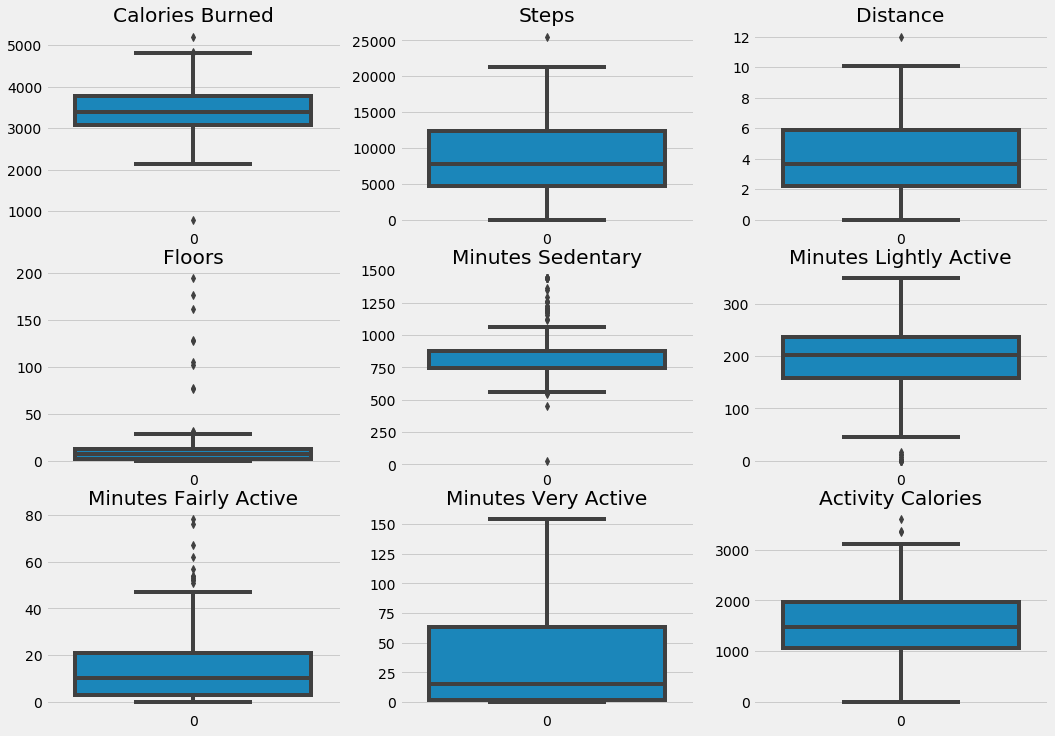

In [248]:
fitbit.plot_subs(df,
             df.select_dtypes(include='number').columns.values)

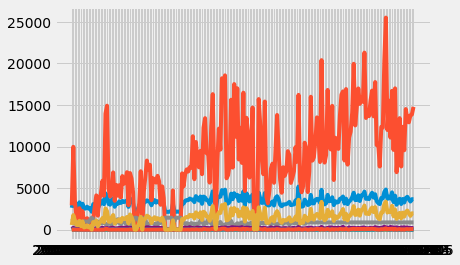

In [249]:
plt.plot(df)
plt.show()

## Cleanup Missing Values

In [303]:
df = df.reset_index()

In [304]:
df.Date = pd.to_datetime(df.Date)

In [305]:
df.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0
1,2018-04-27,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0
2,2018-04-28,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0
3,2018-04-29,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0
4,2018-04-30,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0


In [310]:
missing = {'Date': '7/28/18', 'Calories Burned': 3358, 'Steps': 8073, 'Distance': 3.81, 'Floors': 5.0, 'Minutes Sedentary': 674.0, 'Minutes Lightly Active': 236.0, 'Minutes Fairly Active': 19.0, 'Minutes Very Active': 9.0, 'Activity Calories': 1481}

In [313]:
df = df.append(missing, ignore_index=True)

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null object
Calories Burned           225 non-null float64
Steps                     225 non-null float64
Distance                  225 non-null float64
Floors                    225 non-null float64
Minutes Sedentary         225 non-null float64
Minutes Lightly Active    225 non-null float64
Minutes Fairly Active     225 non-null float64
Minutes Very Active       225 non-null float64
Activity Calories         225 non-null float64
dtypes: float64(9), object(1)
memory usage: 17.7+ KB


In [315]:
df.Date = pd.to_datetime(df.Date)

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null datetime64[ns]
Calories Burned           225 non-null float64
Steps                     225 non-null float64
Distance                  225 non-null float64
Floors                    225 non-null float64
Minutes Sedentary         225 non-null float64
Minutes Lightly Active    225 non-null float64
Minutes Fairly Active     225 non-null float64
Minutes Very Active       225 non-null float64
Activity Calories         225 non-null float64
dtypes: datetime64[ns](1), float64(9)
memory usage: 17.7 KB


In [319]:
df = df.sort_values(by='Date')

In [320]:
df.tail(140)

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
85,2018-07-20,3110.0,6680.0,3.15,3.0,1262.000000,136.0,28.0,14.0,1172.0
86,2018-07-21,3983.0,12279.0,5.79,10.0,569.000000,184.0,37.0,83.0,2162.0
87,2018-07-22,3883.0,13418.0,6.33,19.0,839.000000,210.0,16.0,69.0,2015.0
88,2018-07-23,3553.0,9203.0,4.34,5.0,748.000000,204.0,23.0,31.0,1597.0
89,2018-07-24,3510.0,9215.0,4.35,6.0,1203.000000,193.0,15.0,29.0,1551.0
90,2018-07-25,3069.0,5666.0,2.67,8.0,1253.000000,176.0,4.0,7.0,1062.0
91,2018-07-26,3864.0,12467.0,5.88,10.0,704.000000,214.0,11.0,58.0,1962.0
92,2018-07-27,4618.0,16306.0,7.73,18.0,634.000000,244.0,29.0,111.0,2832.0
224,2018-07-28,3358.0,8073.0,3.81,5.0,674.000000,236.0,19.0,9.0,1481.0
93,2018-07-29,3316.0,6450.0,3.04,18.0,1211.000000,192.0,17.0,20.0,1382.0


In [321]:
df = df.set_index('Date')

In [322]:
df.head()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0
2018-04-27,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0
2018-04-28,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0
2018-04-29,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0
2018-04-30,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0


In [323]:
df = df.rename(columns={'Calories Burned': 'calories_burned'})

In [324]:
df = df.reset_index()

In [325]:
df.head()

,Date,calories_burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0
1,2018-04-27,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0
2,2018-04-28,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0
3,2018-04-29,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0
4,2018-04-30,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null datetime64[ns]
calories_burned           225 non-null float64
Steps                     225 non-null float64
Distance                  225 non-null float64
Floors                    225 non-null float64
Minutes Sedentary         225 non-null float64
Minutes Lightly Active    225 non-null float64
Minutes Fairly Active     225 non-null float64
Minutes Very Active       225 non-null float64
Activity Calories         225 non-null float64
dtypes: datetime64[ns](1), float64(9)
memory usage: 17.7 KB


In [327]:
df.Date = pd.to_datetime(df.Date)

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null datetime64[ns]
calories_burned           225 non-null float64
Steps                     225 non-null float64
Distance                  225 non-null float64
Floors                    225 non-null float64
Minutes Sedentary         225 non-null float64
Minutes Lightly Active    225 non-null float64
Minutes Fairly Active     225 non-null float64
Minutes Very Active       225 non-null float64
Activity Calories         225 non-null float64
dtypes: datetime64[ns](1), float64(9)
memory usage: 17.7 KB


In [329]:
df = df.set_index('Date')

In [330]:
df.head()

,calories_burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0
2018-04-27,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0
2018-04-28,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0
2018-04-29,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0
2018-04-30,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0


In [331]:
cal_burned = df.resample('D').calories_burned.mean()

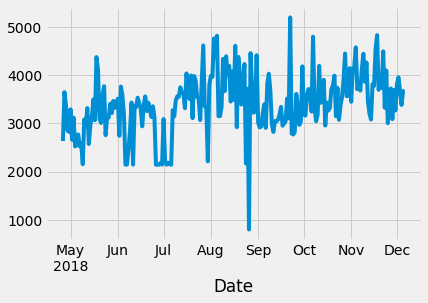

In [332]:
cal_burned.plot()

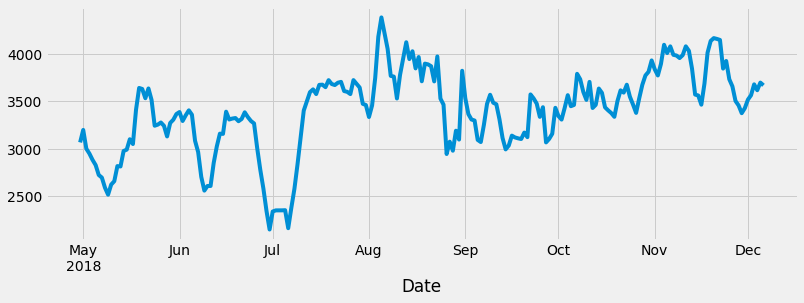

In [333]:
cal_burned.rolling(5).mean().plot(figsize=(12, 4))

In [334]:
cal_burned = cal_burned.fillna(cal_burned.mean())

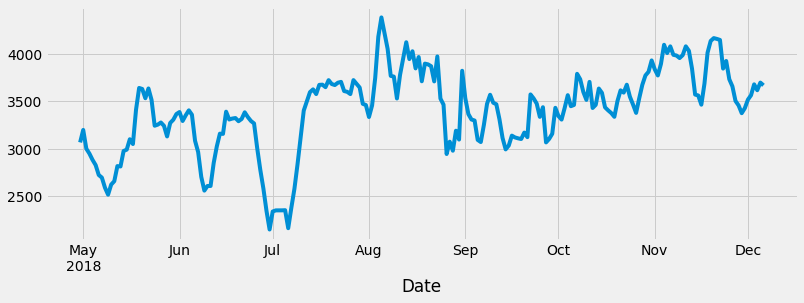

In [335]:
cal_burned.rolling(5).mean().plot(figsize=(12, 4))

In [336]:
df.calories_burned = df.calories_burned.fillna(cal_burned.mean())

In [337]:
df.head()

,calories_burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0
2018-04-27,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0
2018-04-28,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0
2018-04-29,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0
2018-04-30,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0


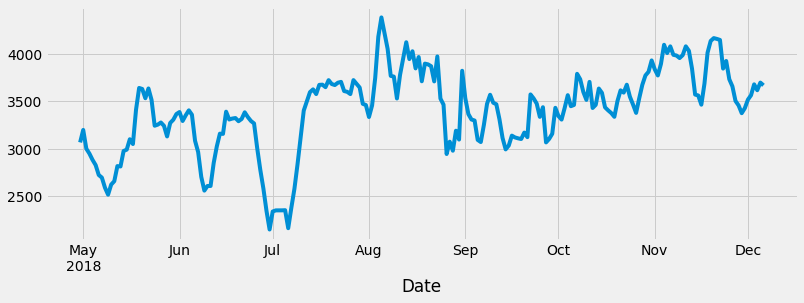

In [338]:
df.calories_burned.rolling(5).mean().plot(figsize=(12, 4))

In [339]:
date_range = df.index

In [340]:
date_range

DatetimeIndex(['2018-04-26', '2018-04-27', '2018-04-28', '2018-04-29',
               '2018-04-30', '2018-05-01', '2018-05-02', '2018-05-03',
               '2018-05-04', '2018-05-05',
               ...
               '2018-11-27', '2018-11-28', '2018-11-29', '2018-11-30',
               '2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04',
               '2018-12-05', '2018-12-06'],
              dtype='datetime64[ns]', name='Date', length=225, freq=None)

In [341]:
df.head()

,calories_burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0
2018-04-27,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0
2018-04-28,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0
2018-04-29,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0
2018-04-30,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0


In [342]:
df = df.reset_index()

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null datetime64[ns]
calories_burned           225 non-null float64
Steps                     225 non-null float64
Distance                  225 non-null float64
Floors                    225 non-null float64
Minutes Sedentary         225 non-null float64
Minutes Lightly Active    225 non-null float64
Minutes Fairly Active     225 non-null float64
Minutes Very Active       225 non-null float64
Activity Calories         225 non-null float64
dtypes: datetime64[ns](1), float64(9)
memory usage: 17.7 KB


In [344]:
df.Date = pd.to_datetime(df.Date)

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null datetime64[ns]
calories_burned           225 non-null float64
Steps                     225 non-null float64
Distance                  225 non-null float64
Floors                    225 non-null float64
Minutes Sedentary         225 non-null float64
Minutes Lightly Active    225 non-null float64
Minutes Fairly Active     225 non-null float64
Minutes Very Active       225 non-null float64
Activity Calories         225 non-null float64
dtypes: datetime64[ns](1), float64(9)
memory usage: 17.7 KB


In [346]:
df = df.set_index('Date')

In [347]:
df.head()

,calories_burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0
2018-04-27,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0
2018-04-28,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0
2018-04-29,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0
2018-04-30,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0


In [348]:
aggregation = 'sum'
ts_data = df['calories_burned'].resample('D').agg(aggregation)

In [349]:
ts_data

Date
2018-04-26    2635.0
2018-04-27    3649.0
2018-04-28    3379.0
2018-04-29    2851.0
2018-04-30    2825.0
2018-05-01    3292.0
2018-05-02    2660.0
2018-05-03    3121.0
2018-05-04    2522.0
2018-05-05    2551.0
2018-05-06    2771.0
2018-05-07    2524.0
2018-05-08    2591.0
2018-05-09    2153.0
2018-05-10    3081.0
2018-05-11    2950.0
2018-05-12    3318.0
2018-05-13    2572.0
2018-05-14    2966.0
2018-05-15    3152.0
2018-05-16    3497.0
2018-05-17    3066.0
2018-05-18    4376.0
2018-05-19    4112.0
2018-05-20    3098.0
2018-05-21    3009.0
2018-05-22    3581.0
2018-05-23    3772.0
2018-05-24    2756.0
2018-05-25    3155.0
               ...  
2018-11-07    3681.0
2018-11-08    4137.0
2018-11-09    4445.0
2018-11-10    3863.0
2018-11-11    4264.0
2018-11-12    3444.0
2018-11-13    3202.0
2018-11-14    3081.0
2018-11-15    3815.0
2018-11-16    3780.0
2018-11-17    4548.0
2018-11-18    4832.0
2018-11-19    3697.0
2018-11-20    3966.0
2018-11-21    3738.0
2018-11-22    4494.0
2018-11-

### Train / Test Split

In [350]:
train_size = int(len(ts_data) * 0.66)
train_1, test_1 = ts_data[0:train_size], ts_data[train_size:len(ts_data)]
print('Observations: %d' % (len(ts_data)))
print('Training Observations: %d' % (len(train_1)))
print('Testing Observations: %d' % (len(test_1)))

Observations: 225
Training Observations: 148
Testing Observations: 77


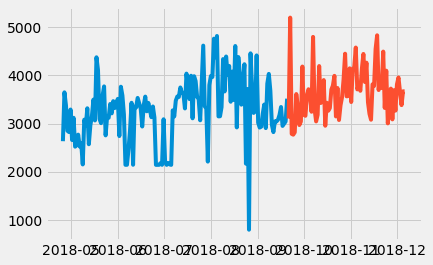

In [351]:
plt.plot(train_1)
plt.plot(test_1)
plt.show()

In [352]:
train_1

Date
2018-04-26    2635.0
2018-04-27    3649.0
2018-04-28    3379.0
2018-04-29    2851.0
2018-04-30    2825.0
2018-05-01    3292.0
2018-05-02    2660.0
2018-05-03    3121.0
2018-05-04    2522.0
2018-05-05    2551.0
2018-05-06    2771.0
2018-05-07    2524.0
2018-05-08    2591.0
2018-05-09    2153.0
2018-05-10    3081.0
2018-05-11    2950.0
2018-05-12    3318.0
2018-05-13    2572.0
2018-05-14    2966.0
2018-05-15    3152.0
2018-05-16    3497.0
2018-05-17    3066.0
2018-05-18    4376.0
2018-05-19    4112.0
2018-05-20    3098.0
2018-05-21    3009.0
2018-05-22    3581.0
2018-05-23    3772.0
2018-05-24    2756.0
2018-05-25    3155.0
               ...  
2018-08-22    3811.0
2018-08-23    4232.0
2018-08-24    2168.0
2018-08-25    3719.0
2018-08-26     799.0
2018-08-27    4458.0
2018-08-28    3757.0
2018-08-29    3222.0
2018-08-30    3253.0
2018-08-31    4415.0
2018-09-01    3020.0
2018-09-02    2918.0
2018-09-03    2936.0
2018-09-04    3201.0
2018-09-05    3395.0
2018-09-06    2907.0
2018-09-

In [353]:
train = pd.DataFrame(train_1)

In [354]:
test = pd.DataFrame(test_1)

In [355]:
train.head()

,calories_burned
Date,
2018-04-26,2635.0
2018-04-27,3649.0
2018-04-28,3379.0
2018-04-29,2851.0
2018-04-30,2825.0


In [356]:
test.head()

,calories_burned
Date,
2018-09-21,3105.0
2018-09-22,5199.0
2018-09-23,2787.0
2018-09-24,2771.0
2018-09-25,2820.0


# ARIMA Model

In [357]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #Determine rolling statistics
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    
    #Plot rolling Statistics
    orig = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)
    
    #Perform Dickey Fuller test
    print("Results of Dickey Fuller test: ")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '# Lag Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

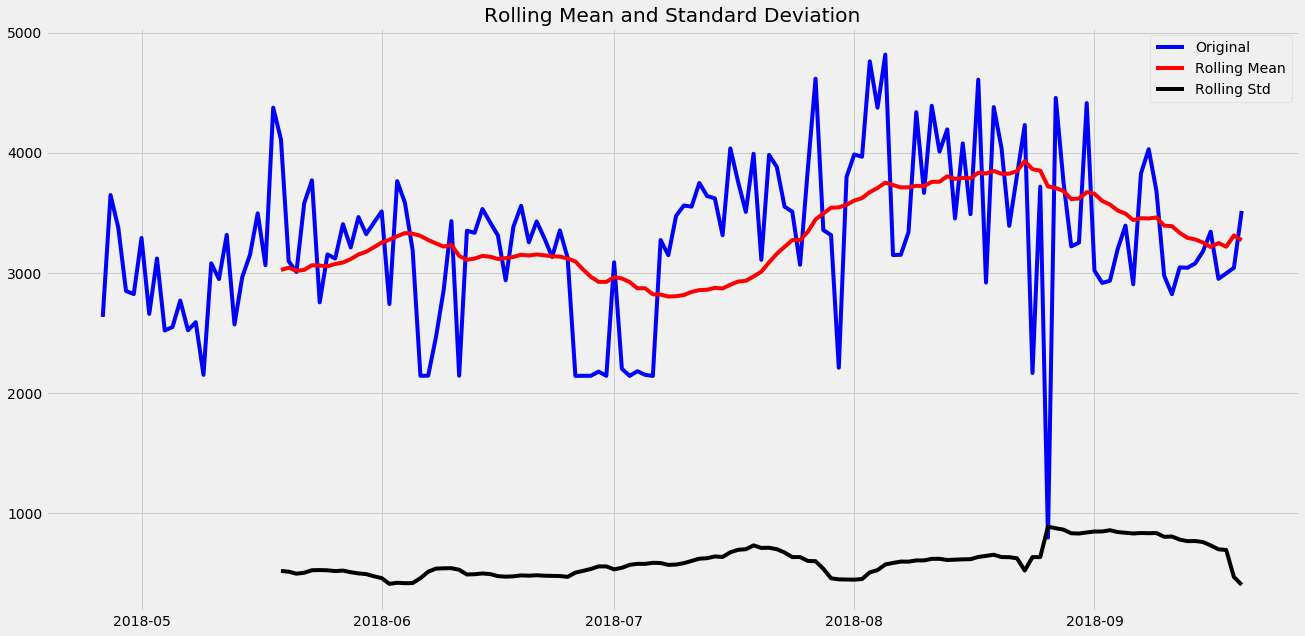

Results of Dickey Fuller test: 
Test Statistics                 -4.796376
p-value                          0.000055
# Lag Used                       1.000000
Number of Observations Used    146.000000
Critical Value (1%)             -3.475953
Critical Value (5%)             -2.881548
Critical Value (10%)            -2.577439
dtype: float64


In [358]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(20,10)
test_stationary(train_1)

In [359]:
df.calories_burned.tail(141)

Date
2018-07-19    3993.0
2018-07-20    3110.0
2018-07-21    3983.0
2018-07-22    3883.0
2018-07-23    3553.0
2018-07-24    3510.0
2018-07-25    3069.0
2018-07-26    3864.0
2018-07-27    4618.0
2018-07-28    3358.0
2018-07-29    3316.0
2018-07-30    2212.0
2018-07-31    3800.0
2018-08-01    3987.0
2018-08-02    3968.0
2018-08-03    4762.0
2018-08-04    4376.0
2018-08-05    4818.0
2018-08-06    3150.0
2018-08-07    3152.0
2018-08-08    3341.0
2018-08-09    4339.0
2018-08-10    3667.0
2018-08-11    4392.0
2018-08-12    4011.0
2018-08-13    4196.0
2018-08-14    3454.0
2018-08-15    4079.0
2018-08-16    3490.0
2018-08-17    4610.0
               ...  
2018-11-07    3681.0
2018-11-08    4137.0
2018-11-09    4445.0
2018-11-10    3863.0
2018-11-11    4264.0
2018-11-12    3444.0
2018-11-13    3202.0
2018-11-14    3081.0
2018-11-15    3815.0
2018-11-16    3780.0
2018-11-17    4548.0
2018-11-18    4832.0
2018-11-19    3697.0
2018-11-20    3966.0
2018-11-21    3738.0
2018-11-22    4494.0
2018-11-

### Remove Trend

In [361]:
train_log = np.log(train_1)
test_log = np.log(test_1)

In [362]:
train_log.tail(60)

Date
2018-07-23    8.175548
2018-07-24    8.163371
2018-07-25    8.029107
2018-07-26    8.259458
2018-07-27    8.437717
2018-07-28    8.119101
2018-07-29    8.106515
2018-07-30    7.701652
2018-07-31    8.242756
2018-08-01    8.290794
2018-08-02    8.286017
2018-08-03    8.468423
2018-08-04    8.383890
2018-08-05    8.480114
2018-08-06    8.055158
2018-08-07    8.055792
2018-08-08    8.114025
2018-08-09    8.375399
2018-08-10    8.207129
2018-08-11    8.387540
2018-08-12    8.296796
2018-08-13    8.341887
2018-08-14    8.147288
2018-08-15    8.313607
2018-08-16    8.157657
2018-08-17    8.435983
2018-08-18    7.979681
2018-08-19    8.385032
2018-08-20    8.304247
2018-08-21    8.129470
2018-08-22    8.245647
2018-08-23    8.350430
2018-08-24    7.681560
2018-08-25    8.221210
2018-08-26    6.683361
2018-08-27    8.402456
2018-08-28    8.231376
2018-08-29    8.077758
2018-08-30    8.087333
2018-08-31    8.392763
2018-09-01    8.013012
2018-09-02    7.978654
2018-09-03    7.984803
2018-0

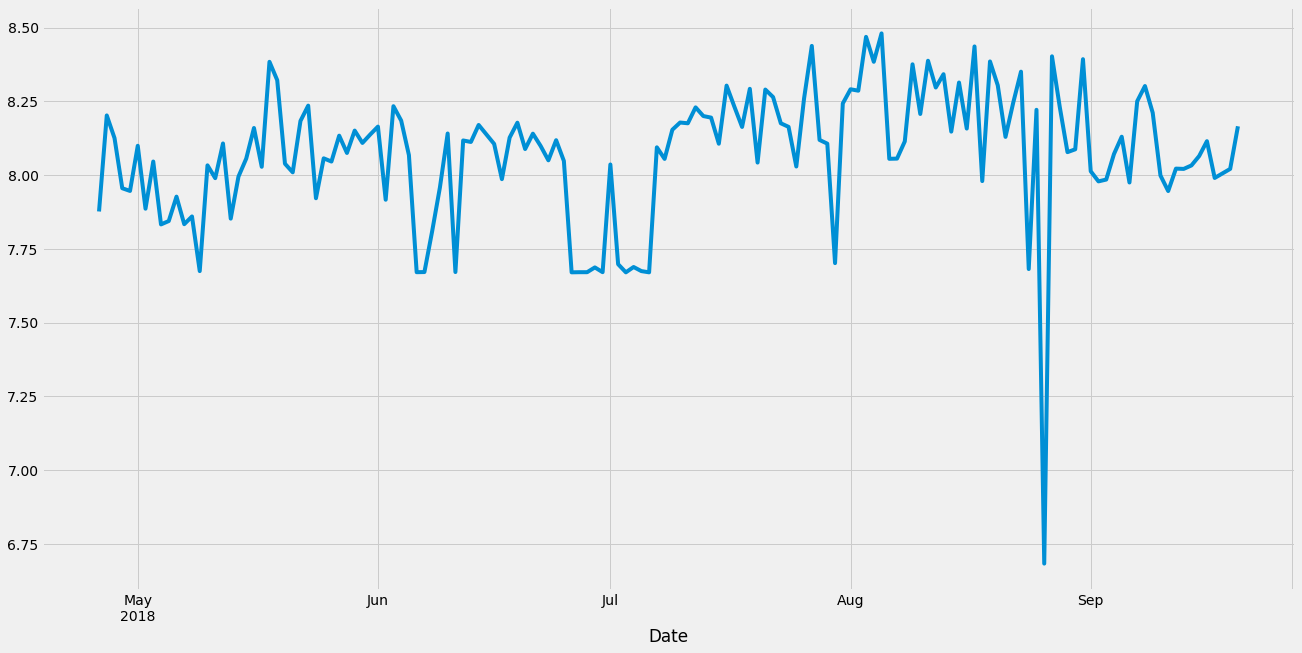

In [363]:
train_log.plot()

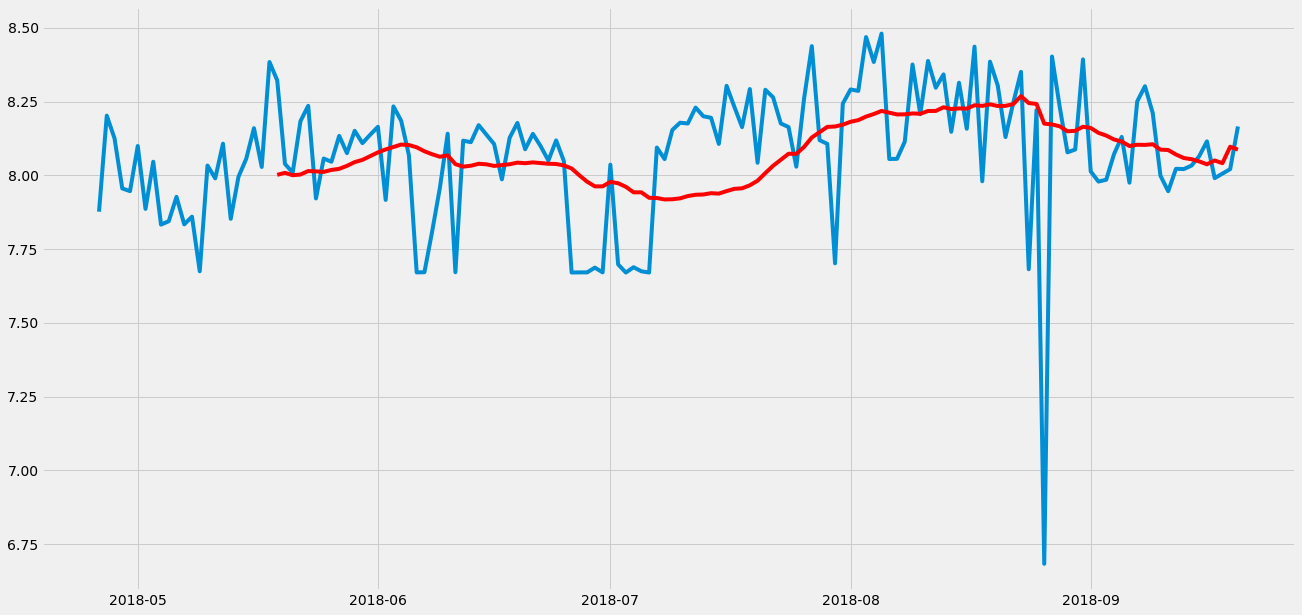

In [364]:
moving_avg = train_log.rolling(24).mean()
plt.plot(train_log)
plt.plot(moving_avg, color = 'red')

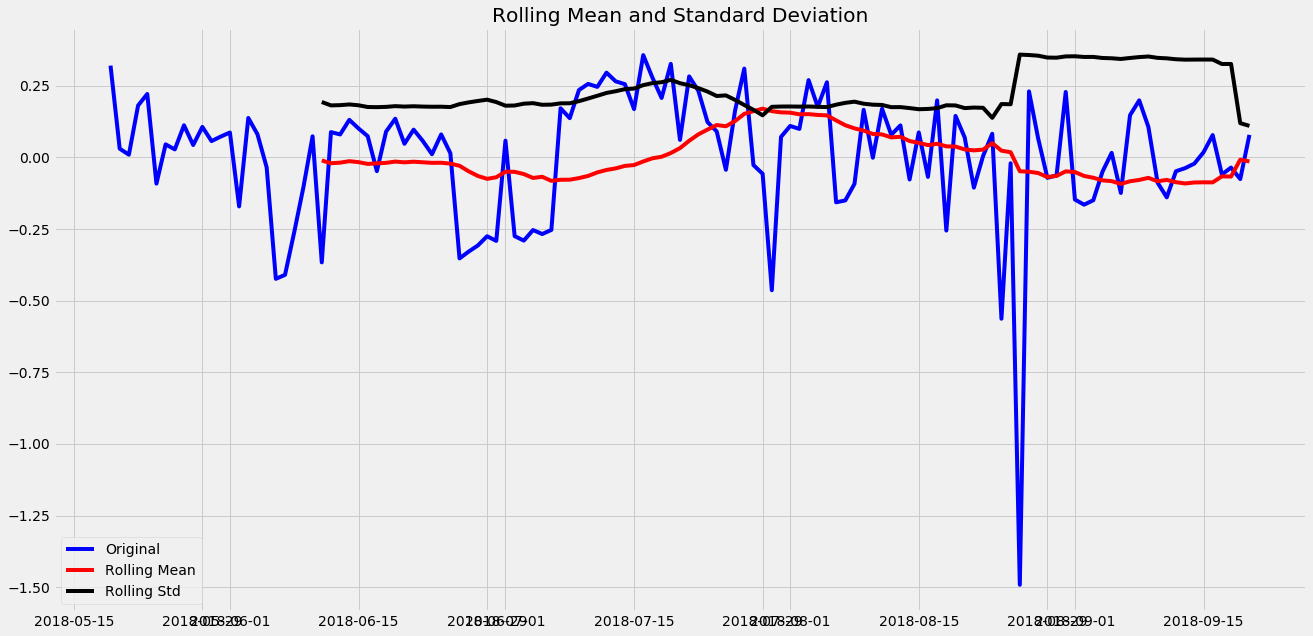

Results of Dickey Fuller test: 
Test Statistics                 -4.967095
p-value                          0.000026
# Lag Used                       1.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


In [365]:

train_log_moving_diff = train_log - moving_avg
train_log_moving_diff.dropna(inplace = True)
test_stationary(train_log_moving_diff)

### Differencing can help to make series stable and eliminate trend


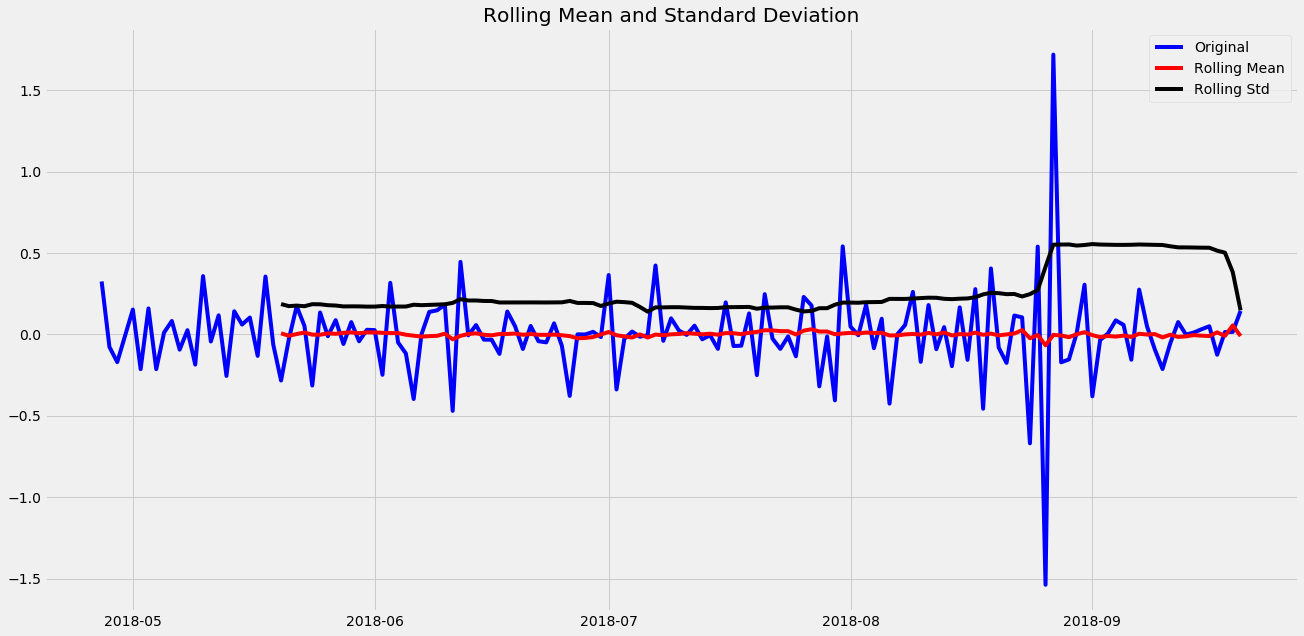

Results of Dickey Fuller test: 
Test Statistics               -7.317233e+00
p-value                        1.220249e-10
# Lag Used                     6.000000e+00
Number of Observations Used    1.400000e+02
Critical Value (1%)           -3.477945e+00
Critical Value (5%)           -2.882416e+00
Critical Value (10%)          -2.577902e+00
dtype: float64


In [366]:
train_log_diff = train_log - train_log.shift(1)
test_stationary(train_log_diff.dropna())

### Removing Seasonailty

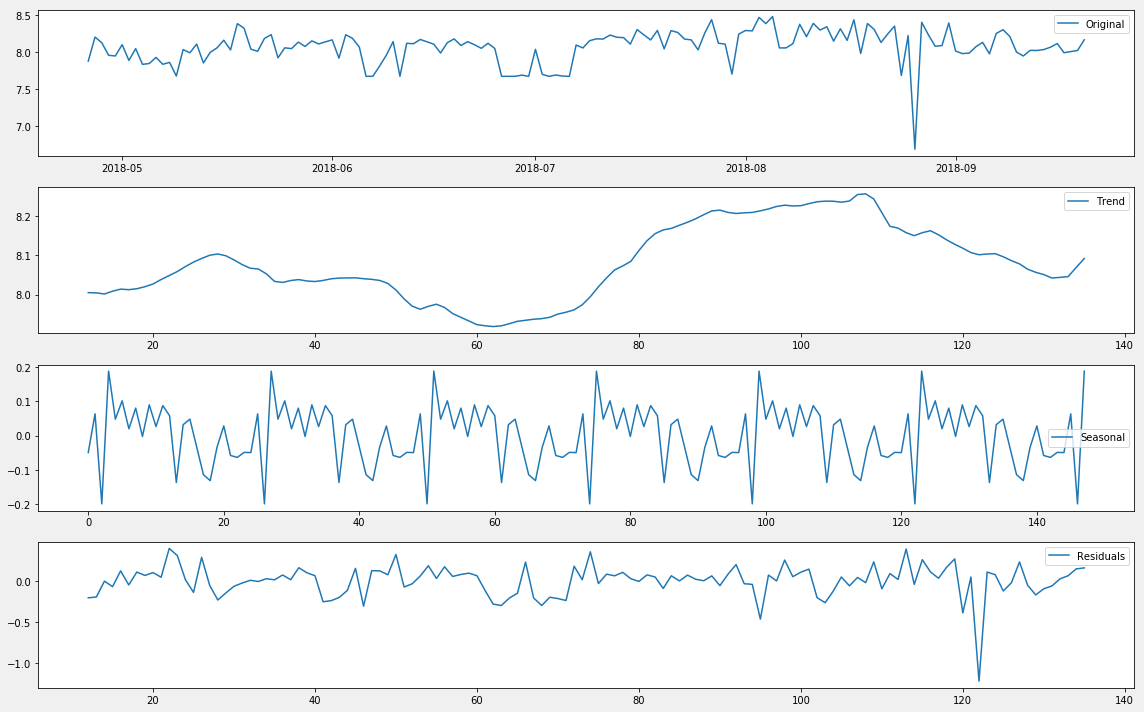

In [367]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (16,10))
decomposition = seasonal_decompose(pd.DataFrame(train_log).calories_burned.values, freq = 24)
plt.style.use('default')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(train_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

### Let's check stationarity of residuals

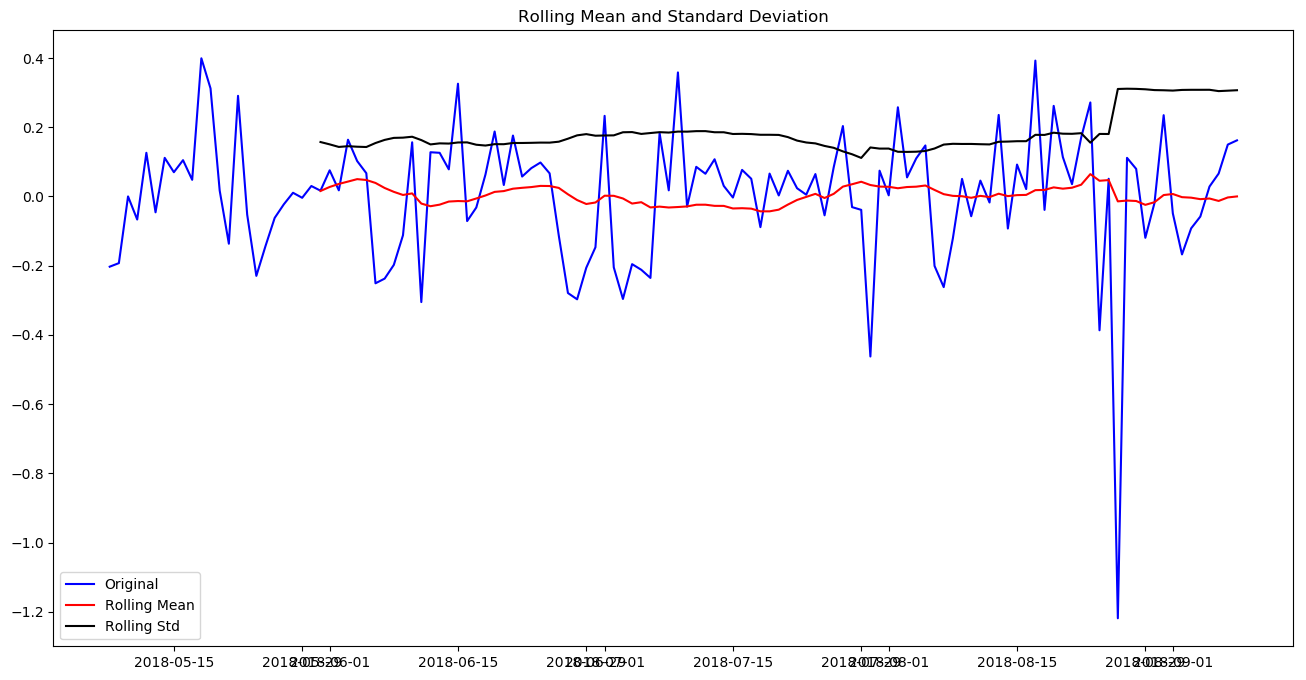

Results of Dickey Fuller test: 
Test Statistics               -6.156501e+00
p-value                        7.346810e-08
# Lag Used                     1.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [369]:
plt.figure(figsize = (16,8))
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace = True)
test_stationary(train_log_decompose[0])

In [370]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff.dropna(), nlags = 25)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 25, method= "ols")

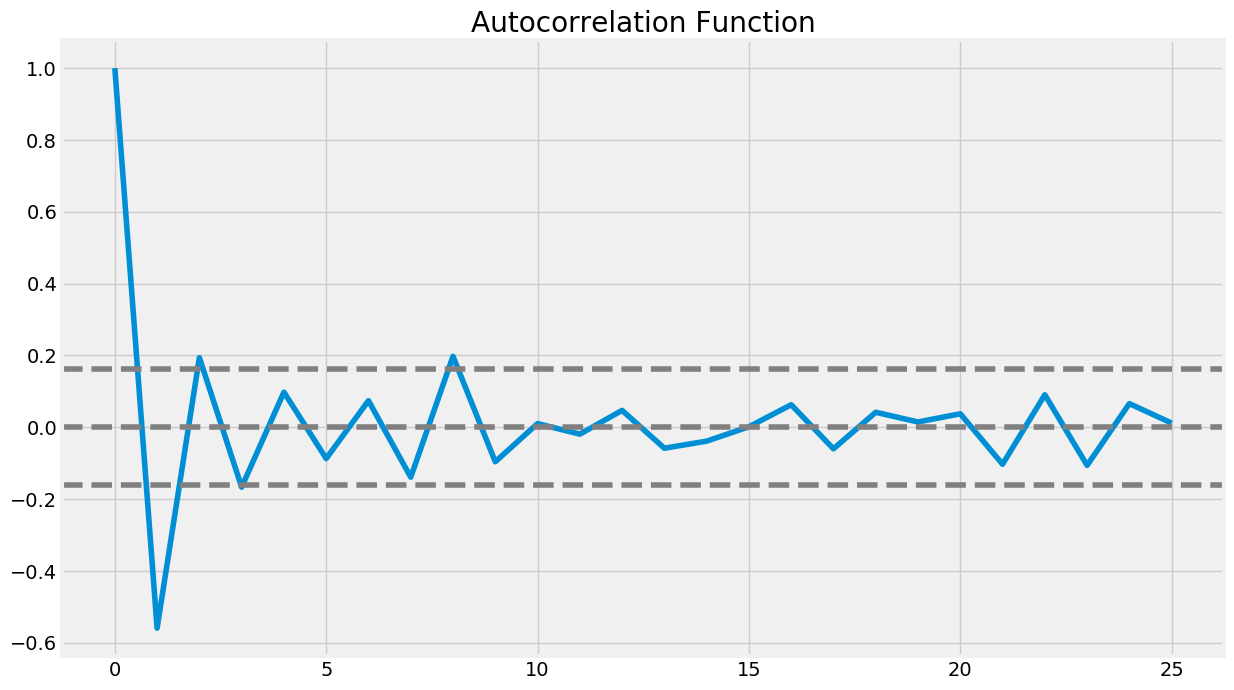

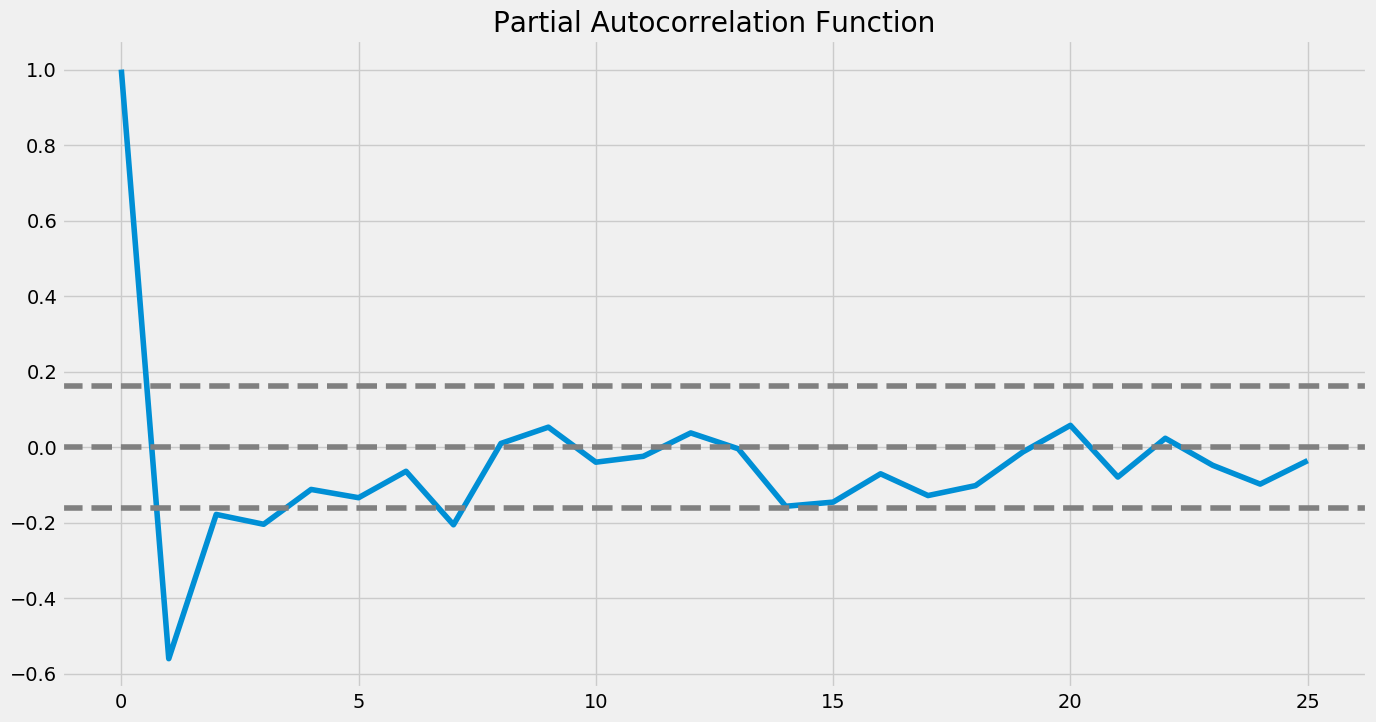

In [371]:

plt.figure(figsize = (15,8))
plt.style.use("fivethirtyeight")
plt.plot(lag_acf)
plt.axhline( y = 0, linestyle = "--", color = "gray")
plt.axhline( y= -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline(y = 1.96 /np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Autocorrelation Function")
plt.show()
# PACF
plt.figure(figsize = (15,8))
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline( y = 1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Partial Autocorrelation Function")
plt.show()

### AR Model

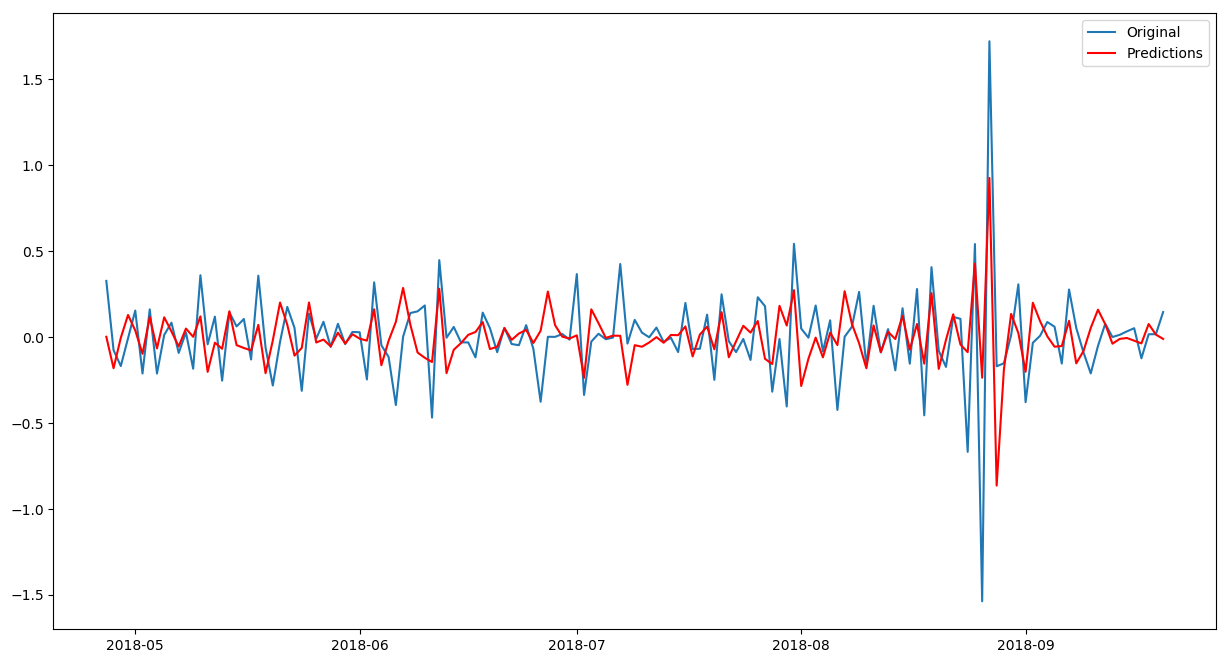

In [368]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize = (15,8))
model = ARIMA(train_log, order = (2,1,0))  #here q value is zero since it is just AR Model
results_AR = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_AR.fittedvalues, color = 'red', label = 'Predictions')
plt.legend(loc = 'best')

In [376]:
train_log

Date
2018-04-26    7.876638
2018-04-27    8.202208
2018-04-28    8.125335
2018-04-29    7.955425
2018-04-30    7.946264
2018-05-01    8.099251
2018-05-02    7.886081
2018-05-03    8.045909
2018-05-04    7.832808
2018-05-05    7.844241
2018-05-06    7.926964
2018-05-07    7.833600
2018-05-08    7.859799
2018-05-09    7.674617
2018-05-10    8.033009
2018-05-11    7.989560
2018-05-12    8.107117
2018-05-13    7.852439
2018-05-14    7.994970
2018-05-15    8.055792
2018-05-16    8.159661
2018-05-17    8.028129
2018-05-18    8.383890
2018-05-19    8.321665
2018-05-20    8.038512
2018-05-21    8.009363
2018-05-22    8.183397
2018-05-23    8.235361
2018-05-24    7.921536
2018-05-25    8.056744
                ...   
2018-08-22    8.245647
2018-08-23    8.350430
2018-08-24    7.681560
2018-08-25    8.221210
2018-08-26    6.683361
2018-08-27    8.402456
2018-08-28    8.231376
2018-08-29    8.077758
2018-08-30    8.087333
2018-08-31    8.392763
2018-09-01    8.013012
2018-09-02    7.978654
2018-0

In [377]:
test_log

Date
2018-09-21    8.040769
2018-09-22    8.556222
2018-09-23    7.932721
2018-09-24    7.926964
2018-09-25    7.944492
2018-09-26    8.192294
2018-09-27    8.116118
2018-09-28    7.996317
2018-09-29    8.020599
2018-09-30    8.339023
2018-10-01    8.064636
2018-10-02    8.058960
2018-10-03    8.184235
2018-10-04    8.219595
2018-10-05    8.189522
2018-10-06    8.085179
2018-10-07    8.476163
2018-10-08    8.101375
2018-10-09    8.021585
2018-10-10    8.065579
2018-10-11    8.341410
2018-10-12    8.139441
2018-10-13    8.150179
2018-10-14    8.269501
2018-10-15    7.991592
2018-10-16    8.140898
2018-10-17    8.091933
2018-10-18    8.108623
2018-10-19    8.217708
2018-10-20    8.239593
                ...   
2018-11-07    8.210940
2018-11-08    8.327726
2018-11-09    8.399535
2018-11-10    8.259199
2018-11-11    8.357963
2018-11-12    8.144389
2018-11-13    8.071531
2018-11-14    8.033009
2018-11-15    8.246696
2018-11-16    8.237479
2018-11-17    8.422443
2018-11-18    8.483016
2018-1

In [378]:
AR_predict = results_AR.predict(start='2018-09-21', end='2018-12-06')
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(test.shape[0])* np.log(test['calories_burned'])[0], index = test.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

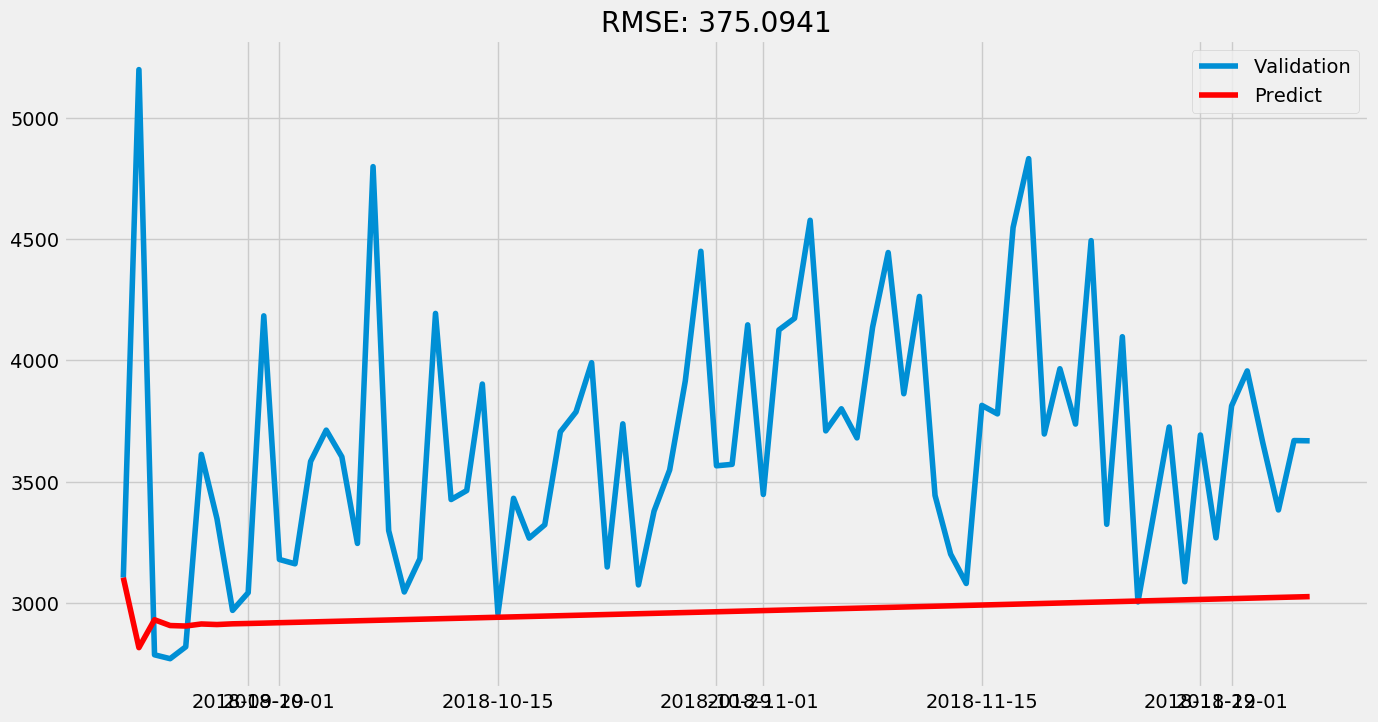

In [380]:
plt.figure(figsize = (15,8))
plt.plot(test, label = "Validation")
plt.plot(AR_predict, color = "red", label = "Predict")
plt.legend(loc = "best")
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, test))/test.shape[0]))
plt.show()

### Moving Average Model

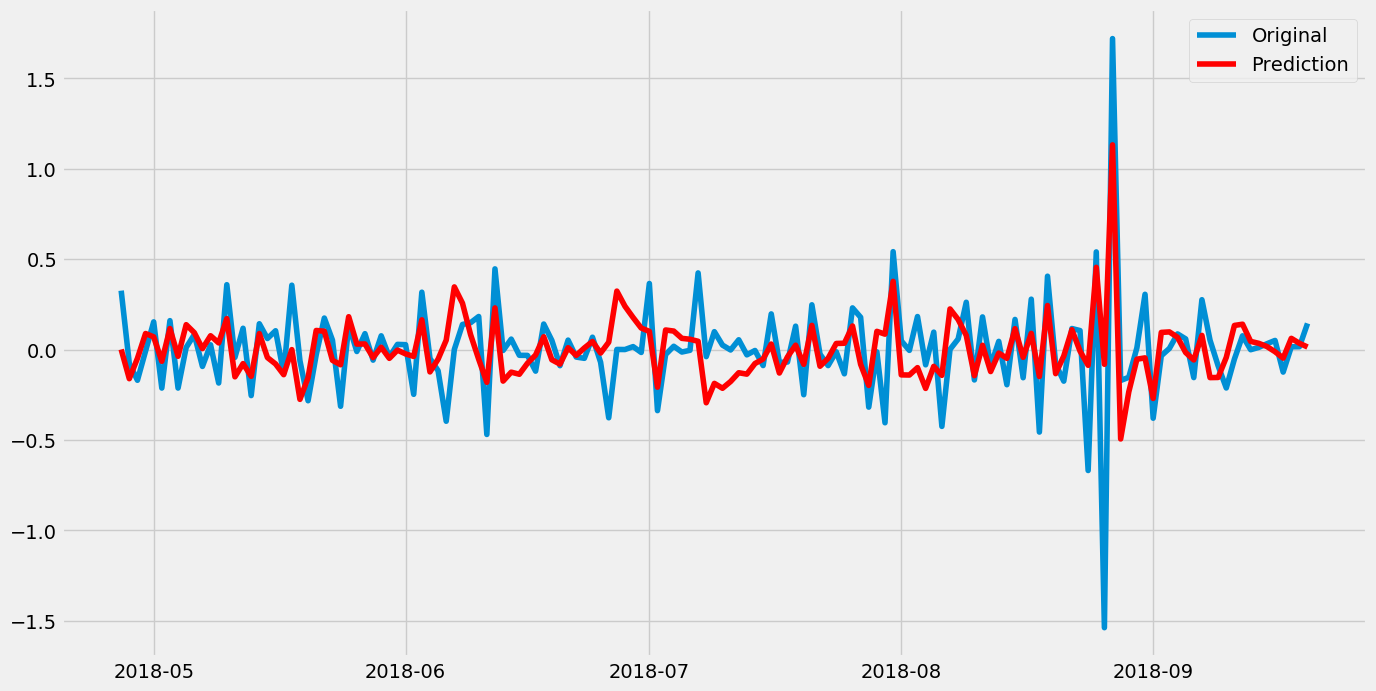

In [385]:
plt.figure(figsize = (15,8))
model = ARIMA(train_log, order = (0,1,2)) # here the p value is 0 since it is moving average model
results_MA = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_MA.fittedvalues, color = "red", label = "Prediction")
plt.legend(loc = "best")

In [413]:
MA_predict = results_MA.predict(start='2018-09-21', end='2018-12-06')
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(test.shape[0]) * np.log(test['calories_burned']), index = test.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)


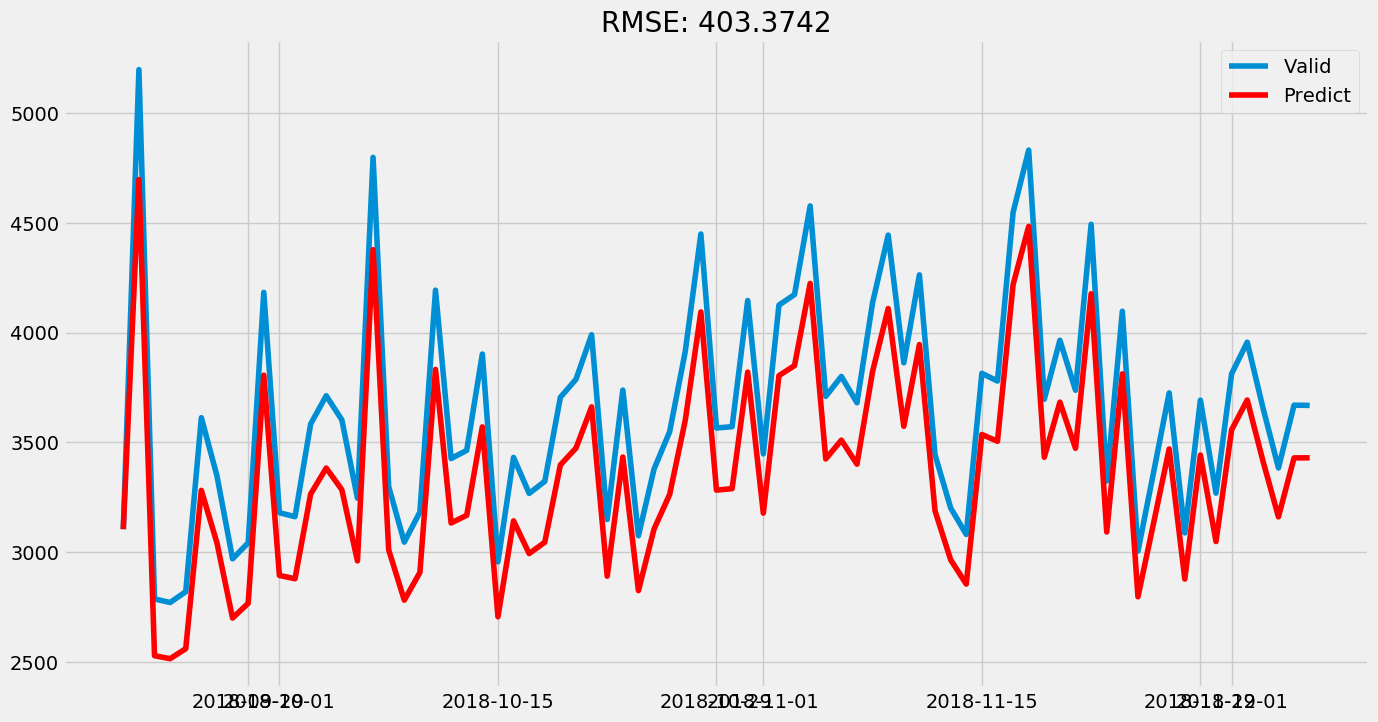

In [414]:
plt.figure(figsize = (15,8))
plt.plot(test, label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, test))/test.shape[0]))
plt.show()

### Combined Model

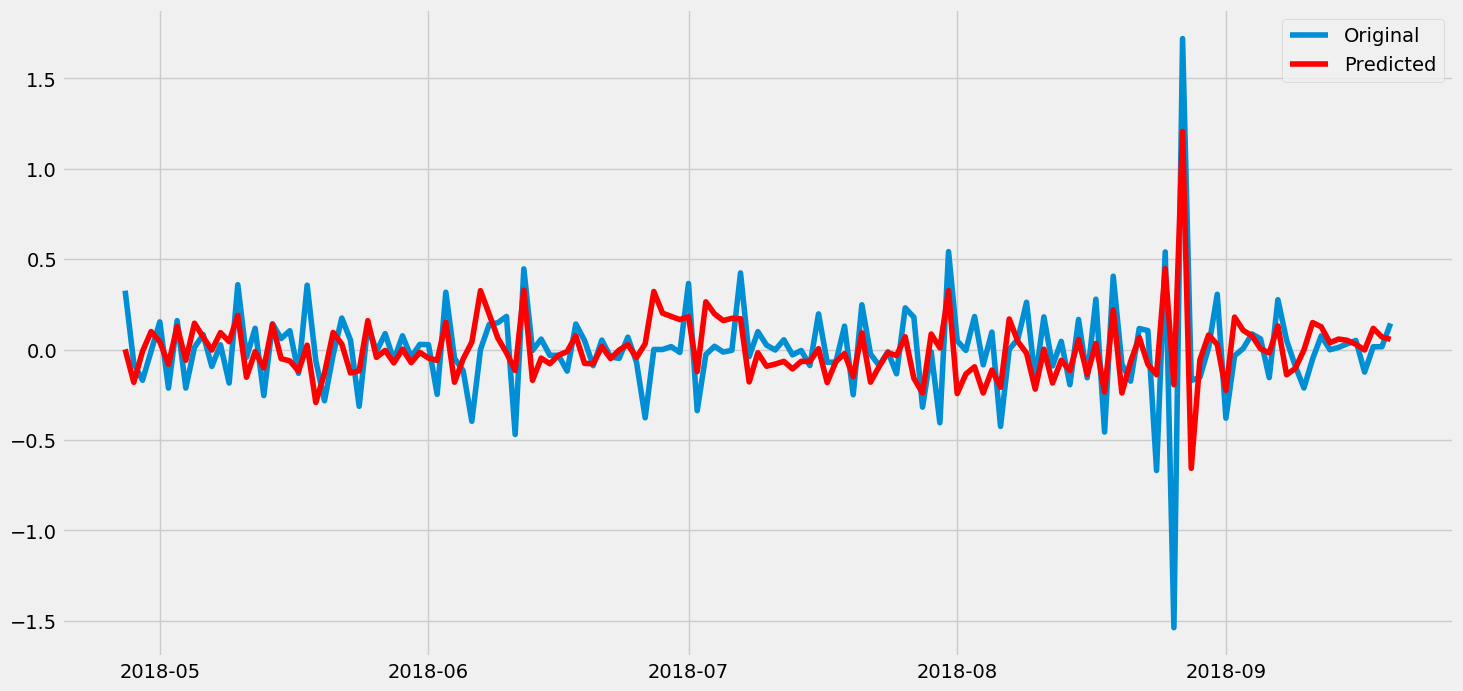

In [416]:
plt.figure(figsize = (16,8))
model = ARIMA(train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [436]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['calories_burned']), index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set, label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set))/given_set.shape[0]))
    plt.show()

In [437]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [438]:
ARIMA_predict_diff=results_ARIMA.predict(start='2018-09-21', end='2018-12-06')


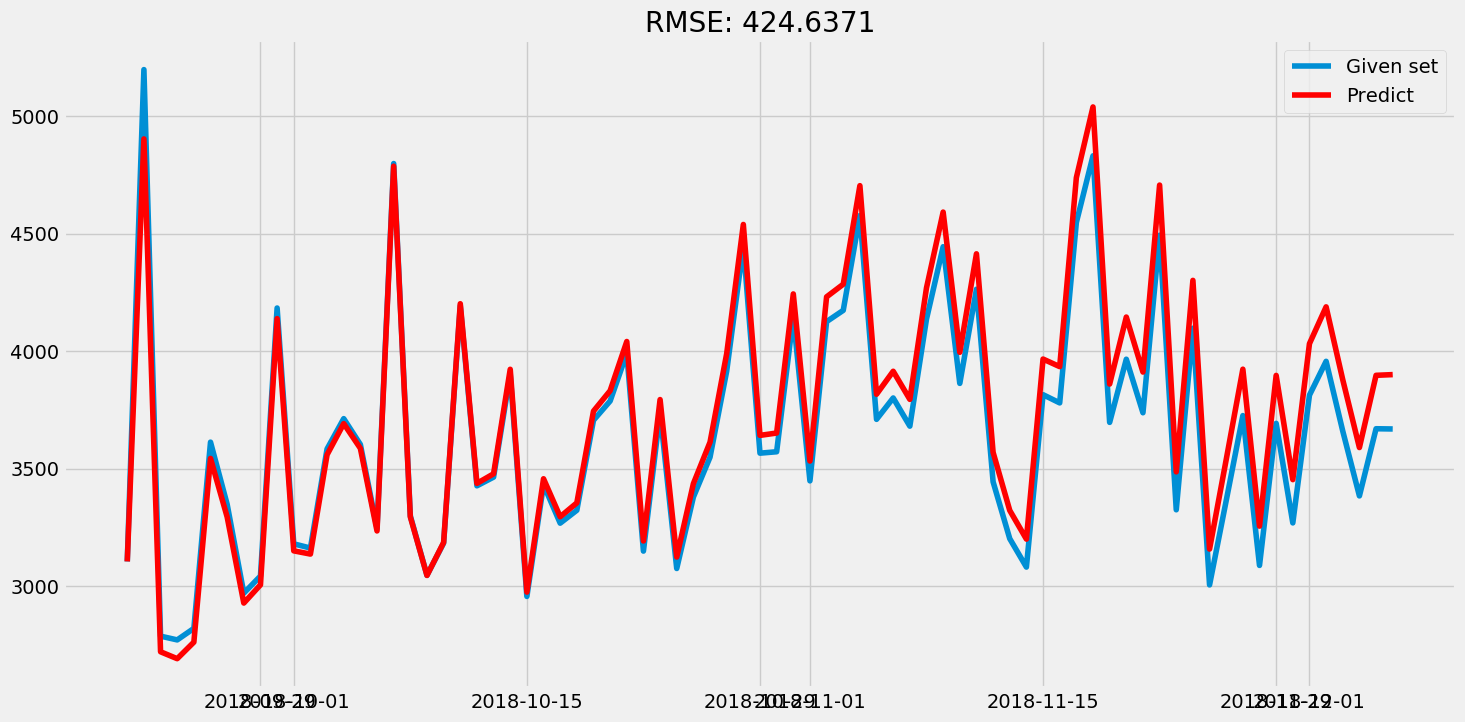

In [439]:
plt.figure(figsize = (16,8))
check_prediction_diff(ARIMA_predict_diff, test)

### SARIMAX Model

In [451]:
import statsmodels.api as sm

Text(0.5, 1.0, 'SARIMAX Model')

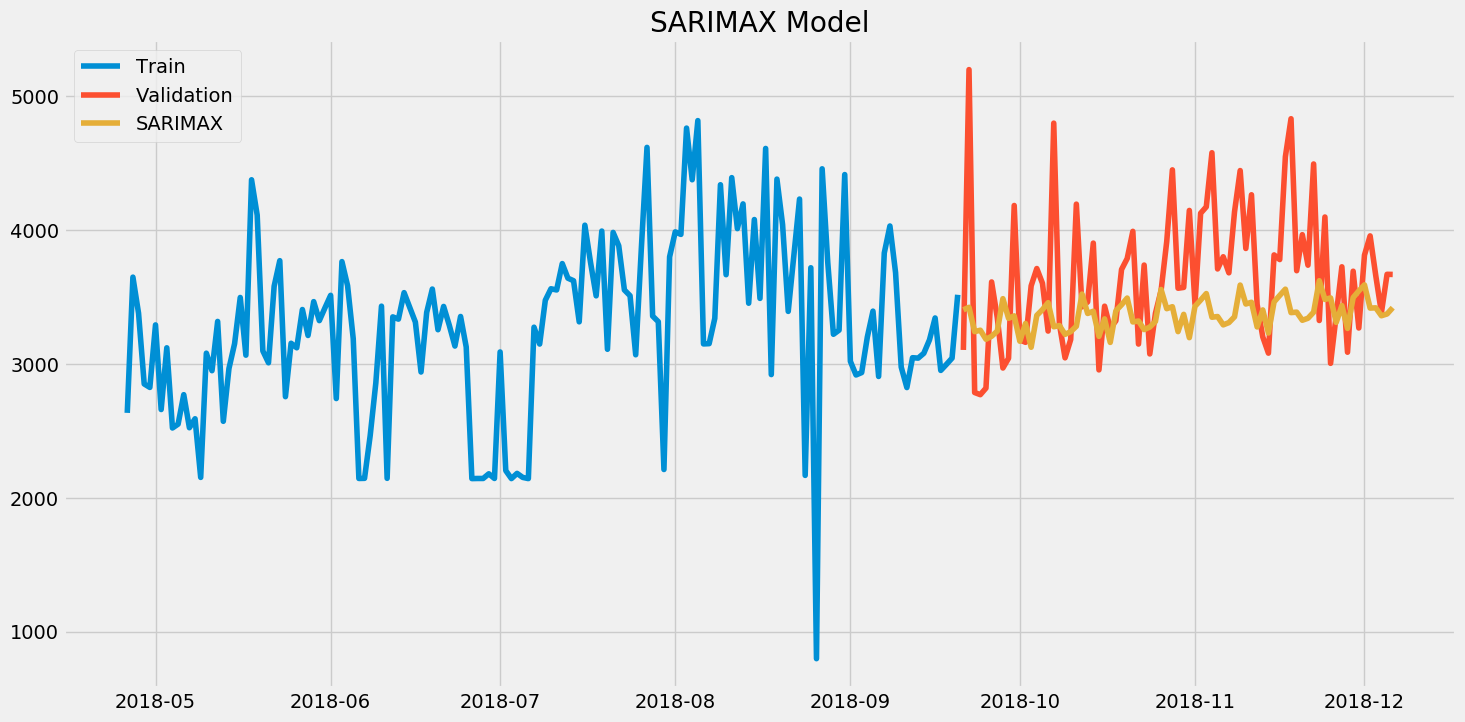

In [468]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train, order = (2,1,4), seasonal_order =(0,1,1,7)).fit()
y_hat_avg['SARIMAX'] = fit1.predict(start='2018-09-21', end='2018-12-06', dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(train, label = "Train")
plt.plot(test, label = "Validation")
plt.plot(y_hat_avg['SARIMAX'], label ="SARIMAX")
plt.legend(loc = "best")
plt.title("SARIMAX Model")

In [469]:
y_hat_avg

,calories_burned,SARIMAX
Date,,
2018-09-21,3105.0,3404.874847
2018-09-22,5199.0,3423.660999
2018-09-23,2787.0,3241.498546
2018-09-24,2771.0,3252.407780
2018-09-25,2820.0,3184.831160
2018-09-26,3613.0,3207.122911
2018-09-27,3348.0,3245.572101
2018-09-28,2970.0,3488.020183
2018-09-29,3043.0,3341.165000


In [470]:
def evaluate(actual, predictions, output=True):
    mse = metrics.mean_squared_error(actual, predictions)
    rmse = math.sqrt(mse)

    if output:
        print('MSE:  {}'.format(mse))
        print('RMSE: {}'.format(rmse))
    else:
        return mse, rmse    

### Evaluate Performance of the SARIMAX Model

In [475]:
evaluate(test, y_hat_avg['SARIMAX'])

MSE:  312255.65671061067
RMSE: 558.7984043558201


### Create dataframe for predictions

In [455]:
date_index = pd.date_range(start='2018-12-07', freq='1d', periods=14)

In [457]:
ddf = pd.DataFrame(dict(calories_burned=df['calories_burned'].mean()), index=date_index)

In [458]:
ddf

,calories_burned
2018-12-07,3401.911111
2018-12-08,3401.911111
2018-12-09,3401.911111
2018-12-10,3401.911111
2018-12-11,3401.911111
2018-12-12,3401.911111
2018-12-13,3401.911111
2018-12-14,3401.911111
2018-12-15,3401.911111
2018-12-16,3401.911111


Text(0.5, 1.0, 'SARIMAX Model')

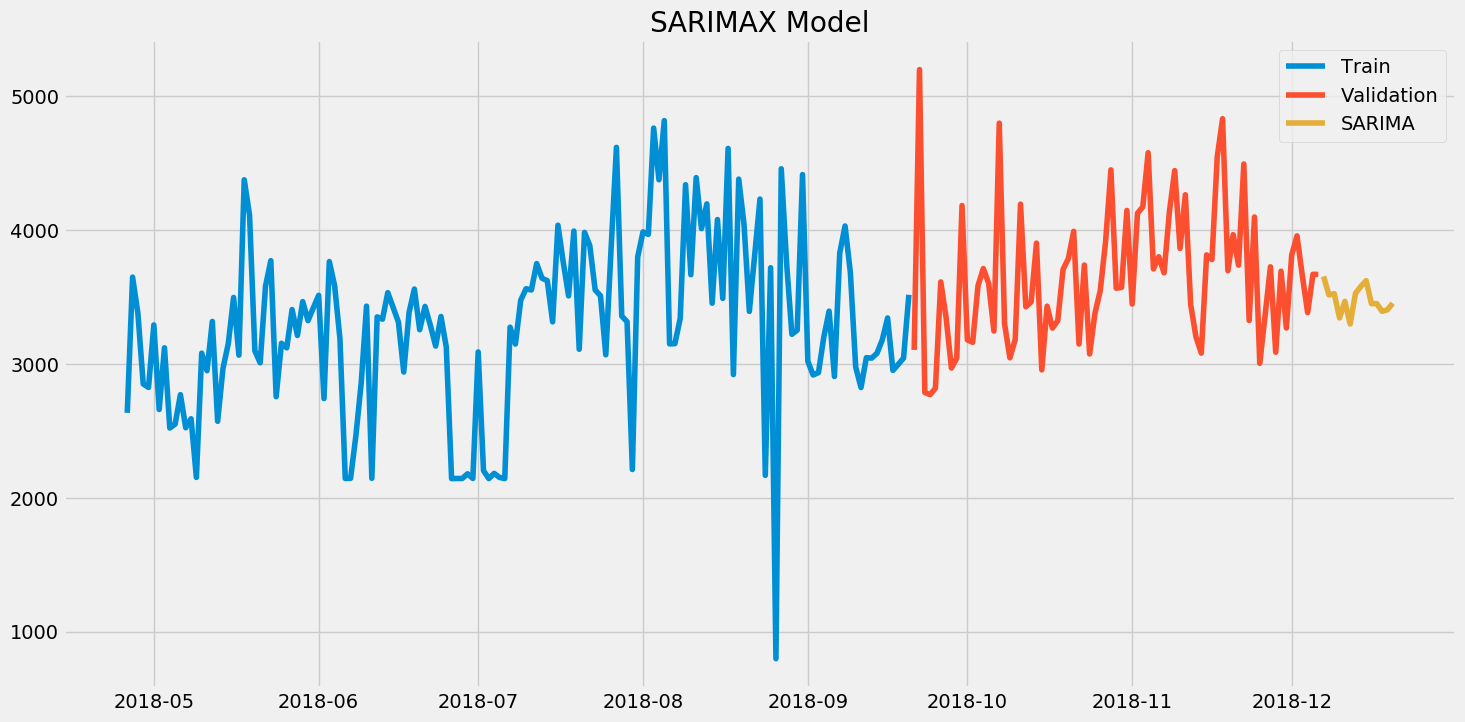

In [462]:
y_hat_avg2 = ddf.copy()
fit1 = sm.tsa.statespace.SARIMAX(train, order = (2,1,4), seasonal_order =(0,1,1,7)).fit()
y_hat_avg2['SARIMAX'] = fit1.predict(start='2018-12-07', end='2018-12-20', dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(train, label = "Train")
plt.plot(test, label = "Validation")
plt.plot(y_hat_avg['SARIMA'], label ="SARIMA")
plt.legend(loc = "best")
plt.title("SARIMAX Model")

In [463]:
y_hat_avg2

,calories_burned,SARIMAX
2018-12-07,3401.911111,3654.125503
2018-12-08,3401.911111,3515.854349
2018-12-09,3401.911111,3525.400065
2018-12-10,3401.911111,3344.317903
2018-12-11,3401.911111,3467.943534
2018-12-12,3401.911111,3298.749144
2018-12-13,3401.911111,3527.896001
2018-12-14,3401.911111,3579.361865
2018-12-15,3401.911111,3622.701095
2018-12-16,3401.911111,3450.827166


### Make final predictions

In [477]:
plt.figure(figsize = (16,8))
model = ARIMA(y_hat_avg2.calories_burned, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

LinAlgError: SVD did not converge

<Figure size 1152x576 with 0 Axes>